In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import CustomObjectScope
import numpy as np
from tensorflow.keras import backend as K
from metrics import dice_loss, dice_coef, iou
import cv2

""" Loading image """

img = cv2.imread('temp.png', cv2.IMREAD_COLOR)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



img = cv2.resize(img, (512, 512))
img = img/255.0



1/1 [==============================] - 1s 1s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 512, 512, 1)


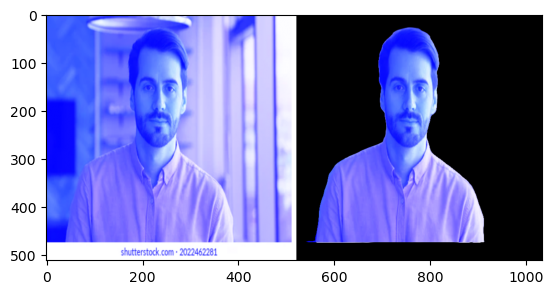

In [6]:
""" Loading model """
with CustomObjectScope({'iou': iou, 'dice_coef': dice_coef, 'dice_loss': dice_loss}):
    model = tf.keras.models.load_model("model.h5")


predictions = model.predict(np.expand_dims(img, 0))
y = predictions[0]
masked_image = img * y
line = np.ones((512, 10, 3)) * 128
cat_images = np.concatenate([img, line, masked_image], axis=1)

print(predictions.shape)
plt.imshow(cat_images)

In [2]:

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x107978f70>>
Traceback (most recent call last):
  File "/Users/xkal/miniforge3/envs/py38/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


INFO:tensorflow:Assets written to: /var/folders/gj/bxnhxpjn0dl89lcf34c8qqp00000gn/T/tmpss0tjvlh/assets


INFO:tensorflow:Assets written to: /var/folders/gj/bxnhxpjn0dl89lcf34c8qqp00000gn/T/tmpss0tjvlh/assets


INFO: Applying 1 TensorFlow Lite delegate(s) lazily.
INFO: Failed to apply the default TensorFlow Lite delegate indexed at 0 because of incompatibility between runtime and delegate. Ignoring the error, and continuing anyway.


<class 'numpy.ndarray'>


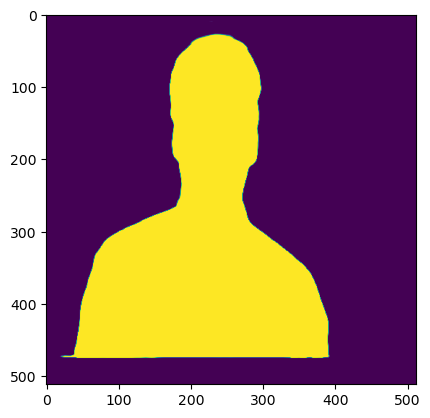

In [10]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="converted_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test model on random input data.
input_shape = input_details[0]['shape']
inp = np.expand_dims(img, 0).astype('float32')
print(type(inp))
interpreter.set_tensor(input_details[0]['index'], inp)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
y = interpreter.get_tensor(output_details[0]['index'])[0]
output = img * y
plt.imshow(output)

In [13]:
# Load the TFLite model and specify input and output tensors
interpreter = tf.lite.Interpreter(model_path='converted_model.tflite')
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(input_details)

(512, 512, 3)
